### Домашнее задание к лекции "Визуализация данных"

Обязательная часть
Вам необходимо провести базовый https://en.wikipedia.org/wiki/Exploratory_data_analysis выбранного набора данных.

Требования к анализу:

построить не менее 4 визуализаций различных видов;
каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).
Откуда брать данные?

Можете взять свои рабочие данные, либо найти открытые данные (например, на kaggle.com) по интересующей вас предметной области (тогда не забудьте их выложить на github вместе с ноутбуком).
Если идей нет, можете взять один из перечисленных ниже:

данные приложений из Google Play;
данные о видео из трендов YouTube;
данные об уровне счастья в разных странах.
Дополнительная часть (необязательная)

построить дополнительно не менее 2 визуализаций (итого не менее 6);
в работе должны присутствовать следующие визуализации: boxplot, heatmap, scatter plot matrix;

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#увеличим дефолтный размер графиков во всем ноутбуке (глобальная настройка)
from pylab import rcParams
rcParams['figure.figsize'] = 11,7

In [3]:

df = pd.read_csv('C:\\Users\\alexander.dubovik\\Documents\\PYDA-38\\Statistic_Python\\HW\\Vizualisation\\google_play_store_apps\\googleplaystore.csv')

In [4]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [14]:
# Проверям данные
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [15]:
# Так как больше всего пропусков в Rating посмотрим более подробно сначала данный тип
df['Rating'].describe()

count    9367.000000
mean        4.193338
std         0.537431
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max        19.000000
Name: Rating, dtype: float64

In [44]:
df_var = df.copy() # сделаем копию, что бы сравнить потом рещультаты

In [45]:
df_var['Rating'].fillna(value = df.Rating.mean(), inplace = True)

In [46]:
df_var['Rating'].describe()
# есть выброс, так как оценка 19, явно выбивается, это мы проверим еще ниже

count    10841.000000
mean         4.193338
std          0.499557
min          1.000000
25%          4.100000
50%          4.200000
75%          4.500000
max         19.000000
Name: Rating, dtype: float64

In [47]:
# Далее меняем типы данных, по которым мы планируем строить графики:
df_var['Reviews'] = df_var['Reviews'].astype('float64')
# и получаем ошибку, далее решаем вопрос с ошибкой:

ValueError: could not convert string to float: '3.0M'

In [48]:
#У нас есть строка, которая имела смещение и нарушала весь ряд. Я решил ее удалить.
df[(df['Category']=='1.9')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [49]:
# Удаляем из df_var
df_var = df_var.drop(np.where(df_var['Category']=='1.9')[0])

# И меняем тип данных
df_var['Reviews'] = df_var['Reviews'].astype('float64')

In [29]:
# Далее нам нужно изменить Price, для этого нужно удалить все знаки $

In [50]:
df_var['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [52]:
df_var['Price'] = df_var['Price'].str.replace('$','').astype('float')
df_var['Price'].unique()

C:\Users\alexander.dubovik\AppData\Local\Temp\ipykernel_6796\3839178477.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_var['Price'] = df_var['Price'].str.replace('$','').astype('float')


array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [54]:
df_var.info() # получили желаемые типы

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  float64
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), object(10)
memory usage: 1.2+ MB


In [55]:
# Проверям данные
df_var.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

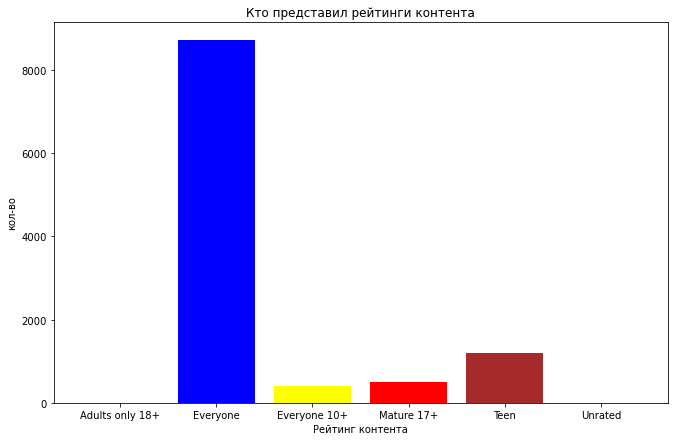

In [69]:

Cont = df_var.groupby('Content Rating')['Rating'].count().reset_index()

plt.bar('Content Rating', 'Rating', data = Cont, color = ['green', 'blue', 'yellow', 'red', 'brown'])
plt.xlabel('Рейтинг контента')
plt.ylabel('кол-во')
plt.title('Кто представил рейтинги контента')
plt.show()

Изходя из полученной визуализации можно понять что больше всего в категории Everyone, далее teen.. т.е. можно оценить объем аудитории 
 

####  Cравним рейтинг приложений для топ-5 категорий при помощи boxplot

<AxesSubplot:xlabel='Category', ylabel='Rating'>

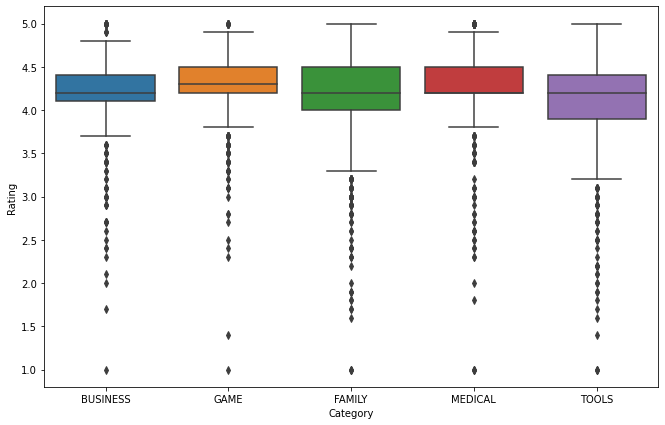

In [113]:

import seaborn as sns
top_category = df_var['Category'].value_counts().sort_values(ascending=False).head(5).index.values
# top_platforms
sns.boxplot(x="Category", y="Rating", 
            data=df_var[df_var['Category'].isin(top_category)])

По данному распределению, Игры, семейные и медицинские категории лидируют, больше всего оценок проставлено семейным и инструментальным категориям. Медицинские и игровые категории имеют больше высоких оценок.

#### Heat map позволяет посмотреть на распределение какого-то численного признака по двум категориальным. Визуализируем ретинги по Category и Content Rating

In [116]:
category_contentrating_rating = df_var[df_var['Category'].isin(top_category)].pivot_table(
                        index='Category', 
                        columns='Content Rating', 
                        values='Rating', 
                        aggfunc=sum).fillna(0)

<AxesSubplot:xlabel='Content Rating', ylabel='Category'>

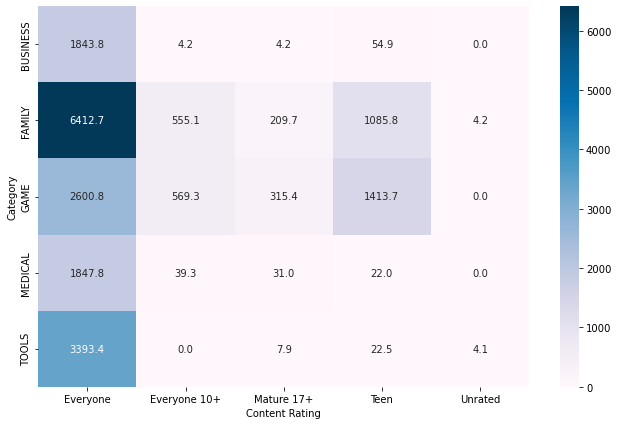

In [125]:
sns.heatmap(category_contentrating_rating, cmap='PuBu', annot=True, fmt=".1f")

In [ ]:
Чаще всего оценивают приложения Family все пользователи, Everyone 10+ и Teen оценивают игры.

#### Общий вывод: Можно предположить, что тинейдежры больше интересуются играми, а в целом пользователи отдают предпочтение категории Family

Для scatterplot буду использовать данные из файла reviews

In [74]:
df_rev = pd.read_csv('C:\\Users\\alexander.dubovik\\Documents\\PYDA-38\\Statistic_Python\\HW\\Vizualisation\\google_play_store_apps\\googleplaystore_user_reviews.csv')


In [75]:
df_rev.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [81]:
df_rev.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


In [96]:
df_rev2 = df_rev.copy()
df_rev2.dropna()
df_rev2.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [91]:
df_rev2.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


(0.0, 1.0)

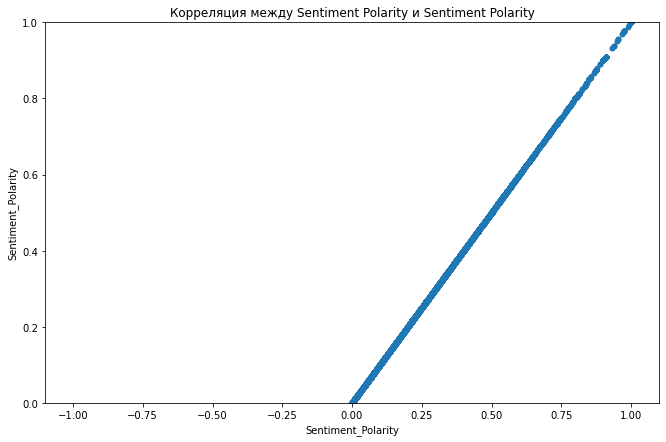

In [104]:
# посмотрим на взаимосвязь рейтинга и продаж
df_rev.plot(kind='scatter', 
        x='Sentiment_Polarity', 
        y='Sentiment_Polarity', 
        title='Корреляция между Sentiment Polarity и Sentiment Polarity')
plt.ylim(0, 1)

In [106]:
# Полярность настроений и субъективность настроений корррелируют. 